In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

/home/gbob/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gbob/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gbob/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gbob/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.w

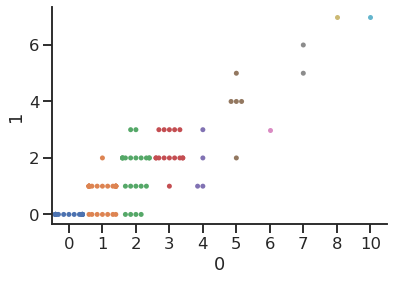

In [136]:
import seaborn as sns

sns.set(style='ticks', context='talk')


sns.swarmplot(0, 1, data=result1)

sns.despine()

In [129]:
df = pd.read_csv('8_29_result.csv')

In [130]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [131]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [132]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [133]:
print(len(True_Duplication))

80


In [134]:
print(len(O_Duplication))

79


In [135]:
print(len(ETE3_Duplication))

0


In [127]:
True_Duplication['Replicate']=[i for i in range(99)]
O_Duplication['Replicate']=[i for i in range(99)]
ETE3_Duplication['Replicate']=[i for i in range(99)]


In [14]:
true_reconils_dups= pd.DataFrame(concat_true-concat_O)
val =['reconcILS' for i in range(99)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [15]:
true_ete3_dups= pd.DataFrame((concat_true-concat_ETE3))
val =['ETE3' for i in range(99)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [16]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,1,0,reconcILS
1,0,0,reconcILS
2,1,1,reconcILS
3,0,0,reconcILS
4,0,1,reconcILS
...,...,...,...
94,0,0,reconcILS
95,0,0,reconcILS
96,1,1,reconcILS
97,2,3,reconcILS


In [17]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,1,-3,ETE3
1,0,2,ETE3
2,1,0,ETE3
3,-1,-9,ETE3
4,-1,0,ETE3
...,...,...,...
94,-1,-9,ETE3
95,0,0,ETE3
96,0,-10,ETE3
97,2,5,ETE3


In [18]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [19]:
val

42

In [20]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,1
1,reconcILS,Duplication,0
2,reconcILS,Duplication,1
3,reconcILS,Duplication,0
4,reconcILS,Duplication,0
...,...,...,...
391,ETE3,Loss,-9
392,ETE3,Loss,0
393,ETE3,Loss,-10
394,ETE3,Loss,5


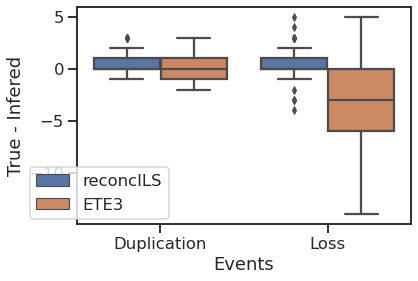

In [21]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.jpg', dpi=500)


In [115]:
result1['count']= result1.value_counts().reset_index(drop=True)

In [118]:
result1

,0,1,count
0,4,3,23.0
1,0,0,18.0
2,1,0,10.0
3,1,1,9.0
4,0,0,7.0
...,...,...,...
94,3,3,NaN
95,0,0,NaN
96,7,6,NaN
97,2,0,NaN


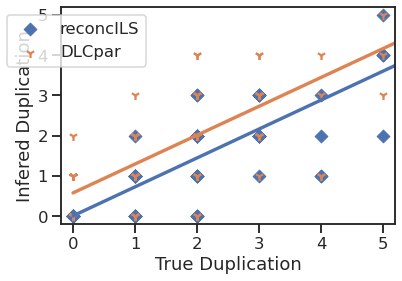

<Figure size 432x288 with 0 Axes>

In [109]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)

result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')
#ax=sns.regplot(x=list(range(98)), y=list(range(98)), data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='ETE3')



plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

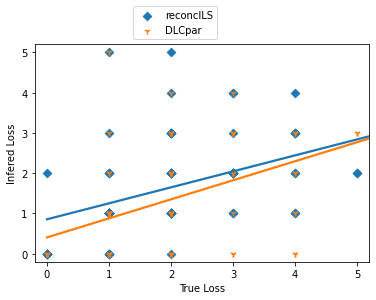

<Figure size 432x288 with 0 Axes>

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

In [67]:
r =result1.astype('category')

In [68]:
r

,0,1
0,4,3
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
94,3,3
95,0,0
96,7,6
97,2,0


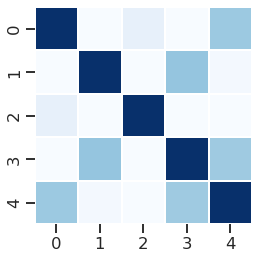

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

10

In [78]:
np.array([list(result1[0]), list(result1[1])])

array([[ 4,  0,  1,  1,  0,  3,  5,  2,  1,  3,  3,  1,  2,  2,  1,  3,
         2,  1,  3,  7,  0,  2,  5,  4,  2,  2,  0,  0,  1,  2,  3,  1,
         8,  1,  2,  0,  2,  2,  0,  1,  2,  3,  2,  5,  6,  0,  0,  1,
         3,  2,  1,  0,  0,  2,  1,  0,  0,  0,  2,  1,  1,  3,  0,  0,
         5,  0,  3,  1,  3,  1,  3,  1,  3,  5,  2,  1,  1,  1,  1,  1,
         1,  4,  0,  0,  2,  0,  1,  2, 10,  0,  1,  2,  4,  3,  3,  0,
         7,  2,  0],
       [ 3,  0,  0,  1,  0,  2,  4,  0,  1,  2,  3,  1,  2,  2,  1,  2,
         2,  1,  2,  5,  0,  1,  5,  2,  1,  3,  0,  0,  1,  3,  2,  1,
         7,  1,  2,  0,  2,  1,  0,  2,  0,  2,  2,  4,  3,  0,  0,  1,
         2,  1,  1,  0,  0,  2,  0,  0,  0,  0,  2,  1,  0,  1,  0,  0,
         2,  0,  3,  1,  3,  0,  2,  1,  3,  4,  2,  1,  0,  1,  0,  1,
         0,  1,  0,  0,  2,  0,  1,  1,  7,  0,  1,  0,  1,  2,  3,  0,
         6,  0,  0]])

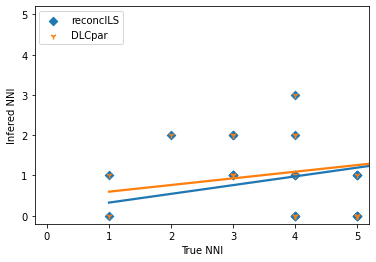

<Figure size 432x288 with 0 Axes>

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)

result12 =pd.concat([TRUE_NNI['NNI'],ETE3_NNI['NNI']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="D", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="1",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

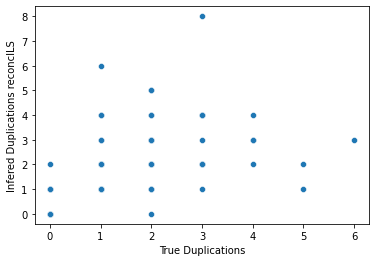

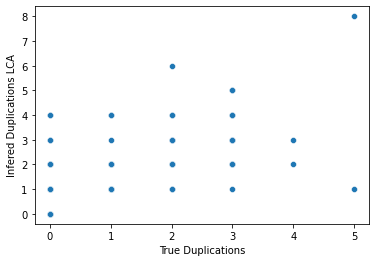

In [40]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

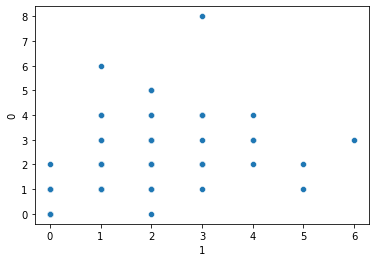

In [41]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [42]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [43]:
rho

0.5245374904076814

In [44]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [45]:
rho

0.595635042452191

In [46]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [47]:
rho

0.8464833156099689

In [48]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [49]:
rho

0.8539012879646104

In [50]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI']))

In [51]:
rho

0.3272746307091541

In [52]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI']))

In [53]:
rho

0.4507378421539443